In [22]:
# Import dependencies
import pandas as pd
import math
import matplotlib.pyplot as plt

In [23]:
# Read data
plays = pd.read_csv('../Resources/plays.csv')

In [24]:
# Drop NaN from absoluteYardlineNumber column
plays.dropna(subset=['absoluteYardlineNumber'], inplace=True)

In [25]:
# Bucket plays by 10yd increments
plays['yardlineBin'] = plays['absoluteYardlineNumber'].apply(lambda x: math.floor(x / 10) * 10)
yardline_data = plays[['yardlineBin', 'playId']].groupby('yardlineBin').count()
yardline_data = yardline_data.rename(columns={'playId': 'plays'}).reset_index()

In [26]:
# Define red zone plays
yardline_data['redZone'] = yardline_data['yardlineBin'] <= 30

In [27]:
# Translate red zone boolean to color map
color_dict = {1: 'red', 0: 'green'}
yardline_data['redZone'] = yardline_data['redZone'].apply(lambda x: color_dict[int(x)])

In [28]:
# Define play frequency
total_plays = len(plays)
print(total_plays)
yardline_data['playFrequency'] = yardline_data['plays'].apply(lambda x: x / total_plays)

8556


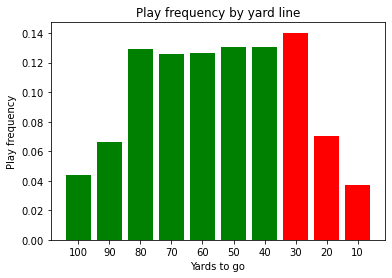

In [29]:
# Create bar chart
yardline_data.sort_values(by=['yardlineBin'], inplace=True, ascending=False)
plt.bar(
    range(len(yardline_data)),
    yardline_data['playFrequency'],
    color=yardline_data['redZone']
)
plt.xticks(range(len(yardline_data)), yardline_data['yardlineBin'])
plt.xlabel('Yards to go')
plt.ylabel('Play frequency')
plt.title('Play frequency by yard line')
plt.show()

In [30]:
yardline_data[['yardlineBin', 'plays', 'playFrequency']].to_csv('./Export/play-frequency-by-yardline.csv', index=False)